<a href="https://colab.research.google.com/github/thxxx/datascience/blob/master/%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from tqdm import tqdm # tqdm?
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split # 데이터 세트를 테스트와 트레인으로 나눠줌
from sklearn.metrics import mean_squared_error, r2_score # metrices중 MSE
from scipy.sparse import csr_matrix # 이건 뭐지?
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(0)
X = 3 * np.random.rand(100,1)
y = 2 + 4*X + np.random.rand(100,1)

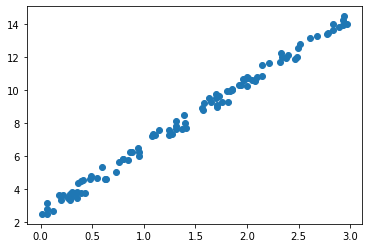

In [ ]:
plt.scatter(X,y)

In [ ]:
def get_cost(y, y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate):
  N = len(y)
  # 먼저 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred
  # w0_updates를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))
  # w1과 w0를 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w2_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update,w2_update

In [ ]:
def gradient_descent_steps(X, y, iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates를 호출해 w1,w0업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y,iters=10000)
print(f"w1:{w1[0,0]} w0:{w0[0,0]}")

y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost : ', get_cost(y,y_pred))

w1:3.978850353401292 w0:2.55808002415696
Gradient Descent Total Cost :  0.07623324582875007


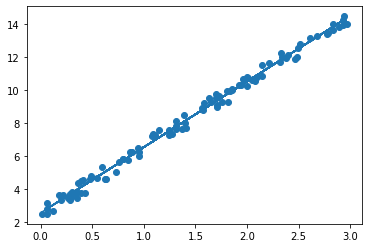

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [ ]:
# 보스턴 데이터 세트 로드
boston = load_boston()

# 보스턴 데이터 세트 DF변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# 보스턴 데이터 세트의 target배열은 주택 가격임. 이를 PRICE칼럼으로 df에 추가.
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


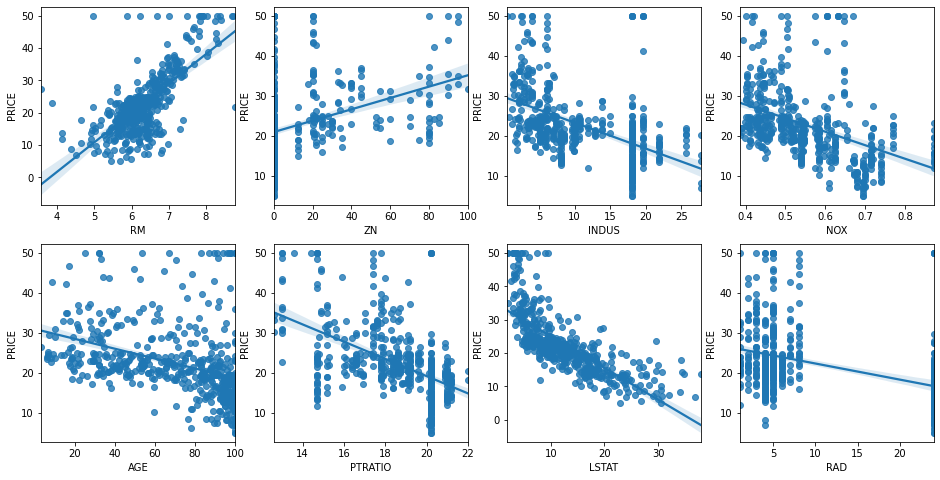

In [ ]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4

  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [ ]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [ ]:
print(f"MSE : {mse}, RMSE: {rmse}")
print(f"Variance score : {r2_score(y_test, y_preds)}")


MSE : 17.296915907902008, RMSE: 4.1589561079556985
Variance score : 0.7572263323138941


In [ ]:
print(f"절편 값 {lr.intercept_}")
print(f"회귀계수 값 {np.round(lr.coef_, 1)}")


절편 값 40.995595172164755
회귀계수 값 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(6).reshape(2, 3)
print('일차 단항식 계수 피처 : \n', X)
#degree2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 사용
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1 2]
 [3 4 5]]
변환된 2차 다항식 계수 피처 : 
 [[ 1.  0.  1.  2.  0.  0.  0.  1.  2.  4.]
 [ 1.  3.  4.  5.  9. 12. 15. 16. 20. 25.]]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
#임의의 값으로 구성된 x값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

이제 예측 결과를 비교할 다항식 차수를 각가 1,4,15로 변경하면서 예측결과 비교


Degree 3 회귀 계수는 [-2.2  -7.06  8.2 ]입니다.
Degree 3 MSE는 0.01874794307309595입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04320874987232058입니다.

Degree 5 회귀 계수는 [ -2.18   0.83 -26.18  48.67 -22.32]입니다.
Degree 5 MSE는 0.09867570671336665입니다.


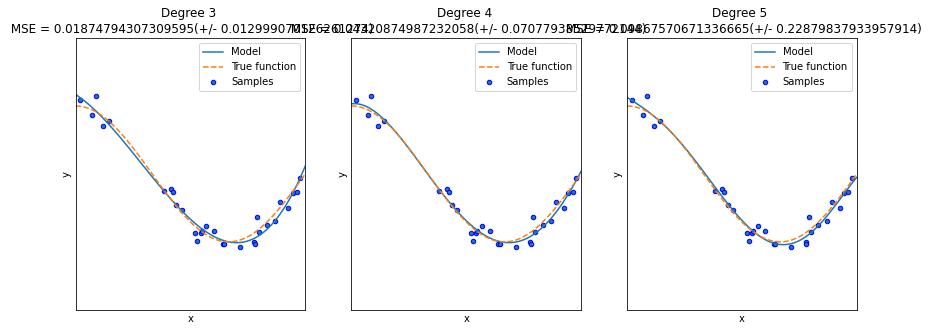

In [ ]:
plt.figure(figsize=(14,5))
degrees = [3,4,5]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named=steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print(f'\nDegree {degrees[i]} 회귀 계수는 {np.round(coefficients,2)}입니다.')
  print(f'Degree {degrees[i]} MSE는 {-1 * np.mean(scores)}입니다.')

  #0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0,1,100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label="True function")
  plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
  plt.title(f"Degree {degrees[i]} \n MSE = {-scores.mean()}(+/- {scores.std()})")

plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 folds의 개별 Negative MSE score: {np.round(neg_mse_scores,3)}')
print(f'5 folds의 개별 RMSE score: {np.round(rmse_scores,3)}')
print(f'5 folds의 평균 RMSE : {avg_rmse}')

5 folds의 개별 Negative MSE score: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE score: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518166280868968


In [ ]:
alphas = [0, 0.1, 1, 10, 100]

# alphas list값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  #cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print(f'alpha {alpha} 일 때 5 folds의 평균 RMSE {avg_rmse}')

alpha 0 일 때 5 folds의 평균 RMSE 5.828658946215809
alpha 0.1 일 때 5 folds의 평균 RMSE 5.7884866270324125
alpha 1 일 때 5 folds의 평균 RMSE 5.652570965613546
alpha 10 일 때 5 folds의 평균 RMSE 5.518166280868968
alpha 100 일 때 5 folds의 평균 RMSE 5.329589628472143


alpha가 100일 때 평균 RMSE가 가장 좋다.
다음은 알파값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화!

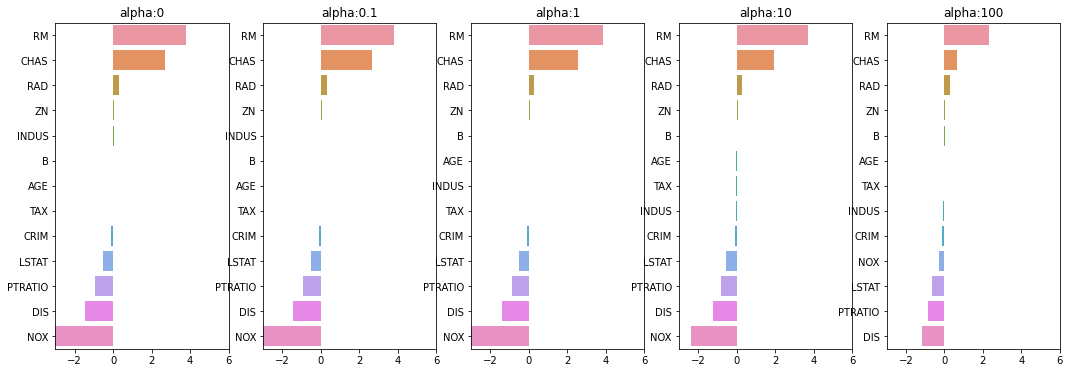

In [ ]:
# 각 알파에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 알파에 따른 회귀 계수 값을 데이터로 저장하기 위한 Data Frame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 저장
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  #alpha에 따른 피처별로 회귀계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha:' + str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀계수를 DataFrame으로 표시
plt.show()

데이터프레임에 저장된 알파값의 변화에 따른 릿지 회귀 계수 값

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수 값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose : print("######", model_name, "######")
  for param in params:
    if model_name =='Ridge': model = Ridge(alpha=param)
    elif model_name =='Lasso': model = Lasso(alpha=param)
    elif model_name =='ElasticNet': model = ElasticNet(alpha=param)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {param}일 때 5폴드 세트의 평균 RMSE {avg_rmse}')
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하며 회귀 계수 추출
    model.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname='alpha:' + str(param)
    coeff_df[colname] = coeff
  return coeff_df

# end of get_linear_regre_eval

In [ ]:
# 라쏘에 사용될 알파 파라미터 값을 정의하고 함수 호출
lasso_alphas = [0.007, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.007일 때 5폴드 세트의 평균 RMSE 5.764233038251302
alpha 0.1일 때 5폴드 세트의 평균 RMSE 5.615116035266935
alpha 0.5일 때 5폴드 세트의 평균 RMSE 5.6691234095948975
alpha 1일 때 5폴드 세트의 평균 RMSE 5.776020813823375
alpha 3일 때 5폴드 세트의 평균 RMSE 6.188763210800905


In [ ]:
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.007,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.812893,3.703202,2.498212,0.949811,0.000000
CHAS,2.558952,0.955190,0.000000,0.000000,0.000000
RAD,0.300783,0.274707,0.277451,0.264206,0.061864
ZN,0.046728,0.049211,0.049544,0.049165,0.037231
INDUS,0.010701,-0.036619,-0.005253,-0.000000,-0.000000
B,0.009433,0.010249,0.009469,0.008247,0.006510
AGE,-0.001065,-0.010037,0.003604,0.020910,0.042495
TAX,-0.012540,-0.014570,-0.015442,-0.015212,-0.008602
CRIM,-0.106763,-0.097894,-0.083289,-0.063437,-0.000000
LSTAT,-0.528765,-0.568769,-0.656290,-0.761115,-0.807679


In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들ㅇ르 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE 5.503208989330456
alpha 0.1일 때 5폴드 세트의 평균 RMSE 5.478389408572094
alpha 0.5일 때 5폴드 세트의 평균 RMSE 5.412658488690829
alpha 1일 때 5폴드 세트의 평균 RMSE 5.521582384760585
alpha 3일 때 5폴드 세트의 평균 RMSE 5.953608548115296


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.445833,3.252662,1.723610,0.933936,0.000000
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
B,0.010035,0.009963,0.008997,0.008339,0.007271
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000


In [ ]:
# method는 표준 정규 분표 변환(Standart), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  if method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
  
  return scaled_data



In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환, 먼저 원본 그대로, 표준 정규 분포, 표준정규분포 + 다항식특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그변환

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMaax',2), ('Log', None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print(f"\n ## 변환 유형: {scale_method[0]}, Polymonial Degree: {scale_method[1]}")
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)




 ## 변환 유형: None, Polymonial Degree: None
alpha 0.1일 때 5폴드 세트의 평균 RMSE 5.7884866270324125
alpha 1일 때 5폴드 세트의 평균 RMSE 5.652570965613546
alpha 10일 때 5폴드 세트의 평균 RMSE 5.518166280868968
alpha 100일 때 5폴드 세트의 평균 RMSE 5.329589628472143

 ## 변환 유형: Standard, Polymonial Degree: None
alpha 0.1일 때 5폴드 세트의 평균 RMSE 5.7884866270324125
alpha 1일 때 5폴드 세트의 평균 RMSE 5.652570965613546
alpha 10일 때 5폴드 세트의 평균 RMSE 5.518166280868968
alpha 100일 때 5폴드 세트의 평균 RMSE 5.329589628472143

 ## 변환 유형: Standard, Polymonial Degree: 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE 9.14083922869904
alpha 1일 때 5폴드 세트의 평균 RMSE 8.938084834495083
alpha 10일 때 5폴드 세트의 평균 RMSE 10.555773579874279
alpha 100일 때 5폴드 세트의 평균 RMSE 10.565932045765773

 ## 변환 유형: MinMax, Polymonial Degree: None
alpha 0.1일 때 5폴드 세트의 평균 RMSE 5.7884866270324125
alpha 1일 때 5폴드 세트의 평균 RMSE 5.652570965613546
alpha 10일 때 5폴드 세트의 평균 RMSE 5.518166280868968
alpha 100일 때 5폴드 세트의 평균 RMSE 5.329589628472143

 ## 변환 유형: MinMaax, Polymonial Degree: 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE 9.14083922

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print(f'accuracy: {accuracy_score(y_test, lr_preds)}')
print(f"roc_auc: {roc_auc_score(y_test, lr_preds)}")

accuracy: 0.9766081871345029
roc_auc: 0.9715608465608465


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'],
          'C': [0.01, 0.1, 1, 10, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터: {grid_clf.best_params_}, 최적 평균 정확도 {grid_clf.best_score_}')

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 0.975392184164114


In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f"5 교차 검증의 개별 Negative MSE scores: {np.round(neg_mse_scores, 2)}")
print(f"5 교차 검증의 개별 RMSE scores: {np.round(rmse_scores, 2)}")
print(f"5 교차 검증의 평균 RMSE: {np.mean(avg_rmse)}")


5 교차 검증의 개별 Negative MSE scores: [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
5 교차 검증의 개별 RMSE scores: [2.82 3.61 4.53 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.420358097543781


In [ ]:
# get_model_cv_prediction() 함수는 입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 RMSE를 계산해주는 함수.
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print('### ', model.__class__.__name__, " ####")
  print(f"5 교차 검증의 평균 RMSE: {avg_rmse}")


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

###  DecisionTreeRegressor  ####
5 교차 검증의 평균 RMSE: 5.977957424580515
###  RandomForestRegressor  ####
5 교차 검증의 평균 RMSE: 4.420358097543781
###  GradientBoostingRegressor  ####
5 교차 검증의 평균 RMSE: 4.269199457750235
[02:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
###  XGBRegressor  ####
5 교차 검증의 평균 RMSE: 4.088922560380566
###  LGBMRegressor  ####
5 교차 검증의 평균 RMSE: 4.646441191925675


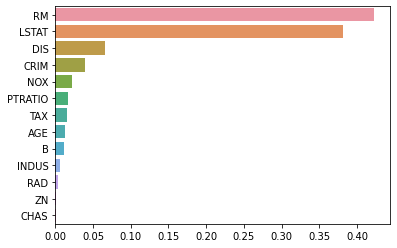

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습한다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


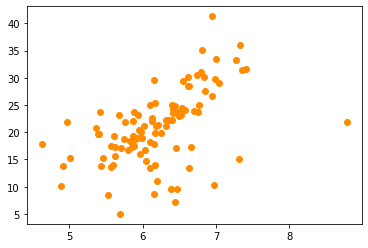

In [ ]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=41)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# 선형 회귀와 결정트리 깁ㄴ의 Regressor 생성. 맥스 뎁스는 각각 2, 7
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세틔로 생성
X_test = np.arange(4.5,8.5,0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

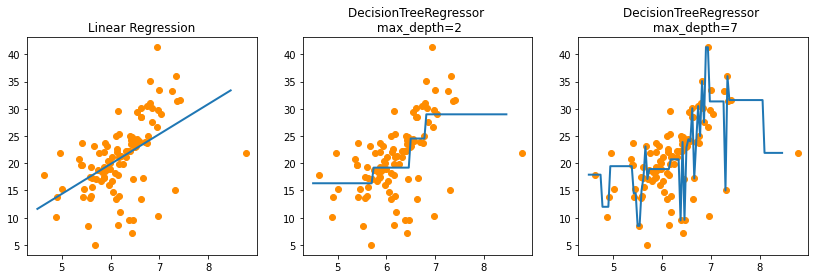

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X 축 값을 4.5~8.5로 변환하며 입력했을 때 선형회귀와 결정 트리 회귀 예측선 시각화
# 선형회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('DecisionTreeRegressor \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

ax3.set_title('DecisionTreeRegressor \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label='linear', linewidth=2)

